# **Random Numbers**
## ECE 204 Data Science & Engineering

In [1]:
import numpy as np
import pandas as pd

np.random.seed(1)

## Uniform random numbers

In [2]:
# generate a random number uniformly in the interval [0,1]
np.random.rand()

0.417022004702574

In [5]:
# import rand function directly for convenience
from numpy.random import rand

# random array of size 2x3
rand(2,3)

array([[0.92943723, 0.69089692, 0.99732285],
       [0.17234051, 0.13713575, 0.93259546]])

<Axes: ylabel='Frequency'>

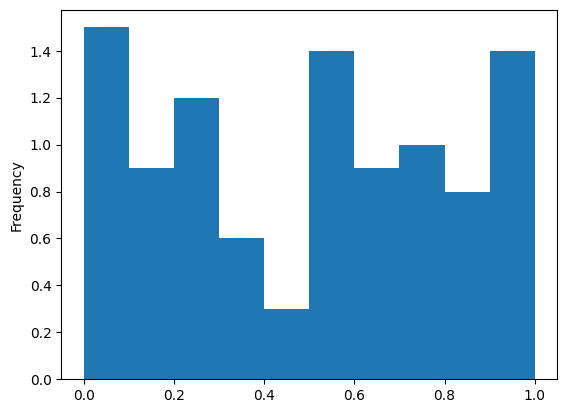

In [6]:
# check uniformity (small sample size)
s = pd.Series( np.random.rand(100) )
s.plot.hist( range=(0,1), density=True )

<Axes: ylabel='Frequency'>

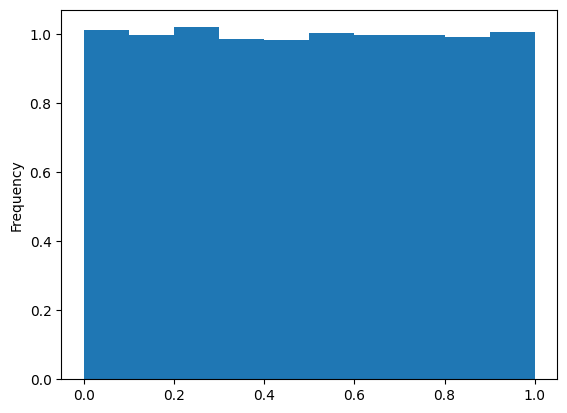

In [7]:
# check uniformity (large sample size)
s = pd.Series( np.random.rand(100000) )
s.plot.hist( range=(0,1), density=True )

<Axes: ylabel='Frequency'>

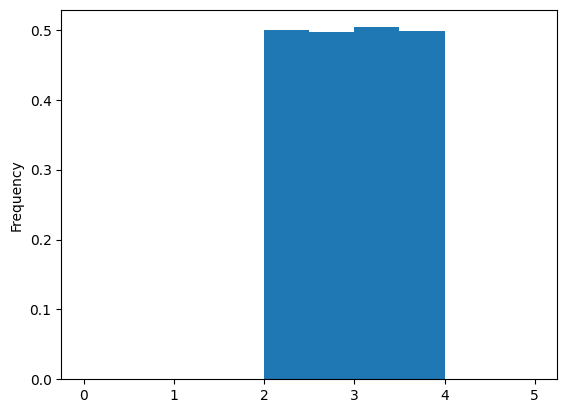

In [8]:
# rescale the random variable so it's in the interval [a,b]
a,b = 2,4
s = pd.Series( (b-a)*rand(100000) + a )
s.plot.hist( range=(0,5), density=True )

## Normal random numbers

In [9]:
# 3x4 array of random normally distributed numbers
# with mean 0 and standard deviation 1
np.random.randn(3,4)

array([[-0.46079363,  0.22488445,  0.69102386, -0.18100829],
       [ 0.27681197,  1.11566538,  0.71074291, -0.79722805],
       [-0.16187083, -0.04595161,  1.38018732, -0.98863055]])

<Axes: ylabel='Frequency'>

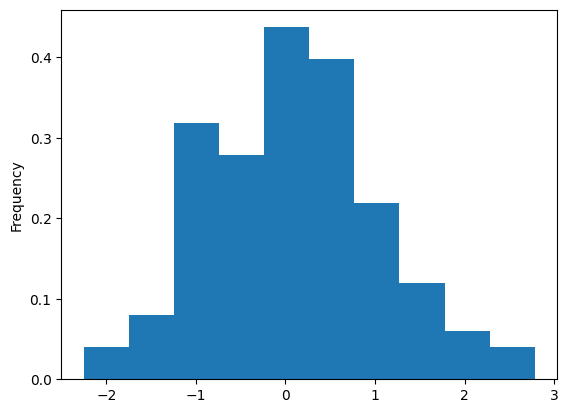

In [10]:
# check normality (small sample size)
s = pd.Series( np.random.randn(100) )
s.plot.hist( density=True )

<Axes: ylabel='Frequency'>

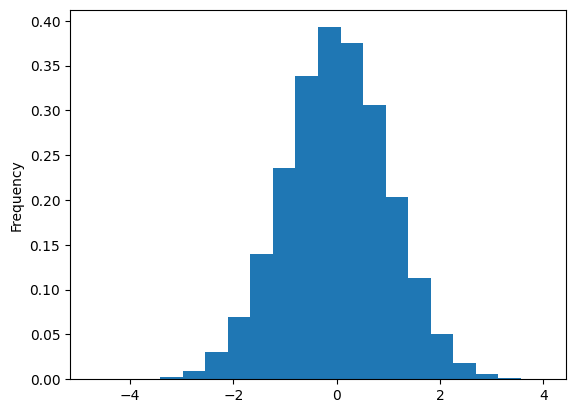

In [11]:
# check normality (large sample size)
s = pd.Series( np.random.randn(100000) )
s.plot.hist( bins=20, density=True )

<Axes: ylabel='Frequency'>

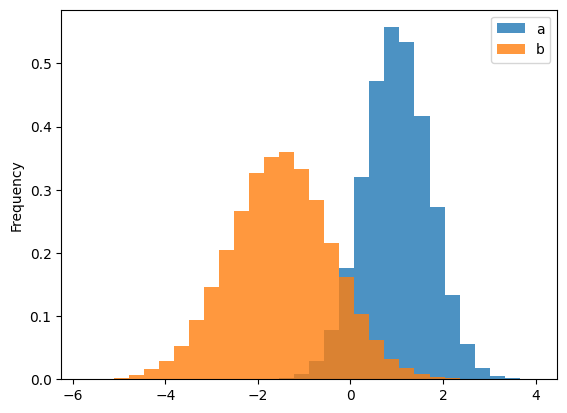

In [12]:
# rescale and plot normal random numbers
# also import randn directly for convenience
from numpy.random import randn
n = 100000
df = pd.DataFrame( {'a': 0.7*randn(n)+1.0,
                    'b': 1.1*randn(n)-1.5 } )
df.plot.hist(bins=30, density=True, alpha=0.8)

## Random integers

In [13]:
# random integers from 1 to 5
np.random.randint(1,6,size=8)

array([4, 4, 4, 3, 5, 3, 2, 4])

In [14]:
# 3x6 array of rand ints from -3 to 2
np.random.randint(-3,3,size=(3,6))

array([[ 2,  1,  0, -1,  1, -2],
       [-1, -3,  2, -1,  2, -1],
       [-3,  2, -2, -2,  1,  2]])

In [15]:
# using indices as slices
numbers = np.random.rand(5)   # make a list of numbers
print(numbers)

indices = np.random.randint(5,size=4)   # make a list of indices
print(indices)

numbers[indices]   # index using indices!

[0.68691409 0.56055579 0.00676978 0.88867496 0.37494999]
[1 1 0 4]


array([0.56055579, 0.56055579, 0.68691409, 0.37494999])

## Sampling

In [16]:
# create a dataframe
names = ['Alice','Bob','Carol','David','Emily','Fred','Gretchen','Harry','Isabelle','John']
ages = [23, 29, 30, 26, 27, 29, 23, 18, 18, 19]

df = pd.DataFrame( {'age':ages}, index=names )

In [17]:
# pick 5 rows at random (may have repetitions!)
ix = np.random.randint(0,10, size=5)
df.iloc[ix]

,age
Bob,29
Fred,29
Carol,30
Carol,30
Gretchen,23


In [18]:
# pick 5 DISTINCT rows at random
df.sample(5)

,age
David,26
Isabelle,18
Fred,29
John,19
Harry,18


In [19]:
# pick 5 rows with replacement
df.sample(5, replace=True)

,age
Emily,27
Emily,27
David,26
Emily,27
Carol,30


In [20]:
# make a list of names and shuffle it!
names = ['Alice','Bob','Carol','David','Emily','Fred','Gretchen','Harry']
np.random.shuffle(names)
print(names)

['Carol', 'Bob', 'David', 'Gretchen', 'Alice', 'Emily', 'Fred', 'Harry']


## EXAMPLE: Deck of cards

In [21]:
suits = ['♠', '♣', '♡', '♢']  # google "unicode characters"
values = [str(i) for i in range(2,11)] + ['J', 'Q', 'K', 'A'] 
deck = [v+s for v in values for s in suits]  # double list comprehension!
print(deck)

['2♠', '2♣', '2♡', '2♢', '3♠', '3♣', '3♡', '3♢', '4♠', '4♣', '4♡', '4♢', '5♠', '5♣', '5♡', '5♢', '6♠', '6♣', '6♡', '6♢', '7♠', '7♣', '7♡', '7♢', '8♠', '8♣', '8♡', '8♢', '9♠', '9♣', '9♡', '9♢', '10♠', '10♣', '10♡', '10♢', 'J♠', 'J♣', 'J♡', 'J♢', 'Q♠', 'Q♣', 'Q♡', 'Q♢', 'K♠', 'K♣', 'K♡', 'K♢', 'A♠', 'A♣', 'A♡', 'A♢']


In [22]:
# shuffle the deck and deal a 7-card hand
np.random.shuffle(deck)
hand = deck[:7]
print(hand)

['A♡', '2♢', '7♢', 'A♠', '9♠', '3♡', '10♢']


## Setting the random seed

In [23]:
# set the seed to "1"
np.random.seed(1)
print( np.random.randn(5) )

# set the seed to "1" again
np.random.seed(1)
print( np.random.randn(3) )

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]
[ 1.62434536 -0.61175641 -0.52817175]
